In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

In [69]:
pension=pd.read_excel("./숙박유형_관광펜션업.xlsx")
camping=pd.read_excel("./숙박유형_일반야영장업.xlsx")
hanok=pd.read_excel("./숙박유형_한옥체험업.xlsx")
resort=pd.read_excel("./숙박유형_호텔리조트.xlsx") #숙소

In [70]:
pension.drop(pension[(pension['영업상태구분코드']!=1)].index,inplace=True)
camping.drop(camping[(camping['영업상태구분코드']!=1)].index,inplace=True)
hanok.drop(hanok[(hanok['영업상태구분코드']!=1)].index,inplace=True)
resort.drop(resort[(resort['영업상태구분코드']!=1)].index,inplace=True)
#1: 영업/정상

In [71]:
pension=pension[pension['개방자치단체코드'].between(4800000,5100000)]
camping=camping[camping['개방자치단체코드'].between(4800000,5100000)]
hanok=hanok[hanok['개방자치단체코드'].between(4800000,5100000)]
resort=resort[resort['개방자치단체코드'].between(4800000,5100000)]

In [72]:
ps=pension.loc[:,['좌표정보(X)','좌표정보(Y)']]
cp=camping.loc[:,['좌표정보(X)','좌표정보(Y)']]
hk=hanok.loc[:,['좌표정보(X)','좌표정보(Y)']]
rs=resort.loc[:,['좌표정보(X)','좌표정보(Y)']]

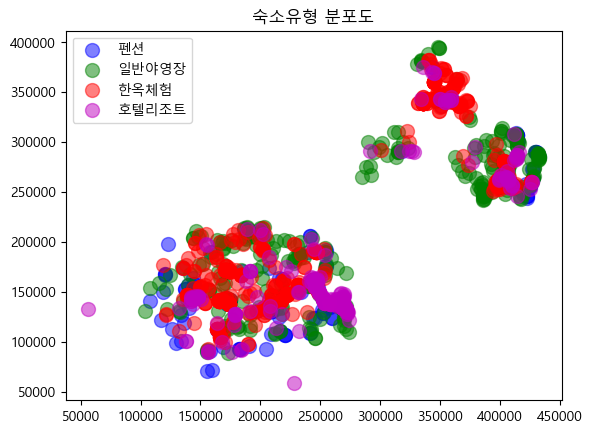

37384.53576041795 451451.44776102906 41296.033761685365 411183.016844688


In [79]:
plt.scatter(x=ps['좌표정보(X)'],y=ps['좌표정보(Y)'],alpha=0.5,s=100,c='b',label='펜션')
plt.scatter(x=cp['좌표정보(X)'],y=cp['좌표정보(Y)'],alpha=0.5,s=100,c='g',label='일반야영장')
plt.scatter(x=hk['좌표정보(X)'],y=hk['좌표정보(Y)'],alpha=0.5,s=100,c='r',label='한옥체험')
plt.scatter(x=rs['좌표정보(X)'],y=rs['좌표정보(Y)'],alpha=0.5,s=100,c='m',label='호텔리조트')

plt.title('숙소유형 분포도')

xmin,xmax=plt.xlim()
ymin,ymax=plt.ylim()

plt.legend()

plt.show()

print(xmin,xmax,ymin,ymax)